In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import os
print(os.listdir("all"))

['sample_submission.csv', 'test.json', 'train.json']


In [66]:
train = pd.read_json("all/train.json")
test = pd.read_json("all/test.json")

print("Example train_Data: ")
print(train.head())
print("\n Count of dishes: ", train.shape[0])

Example train_Data: 
       cuisine     id                                        ingredients
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...
3       indian  22213                [water, vegetable oil, wheat, salt]
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...

 Count of dishes:  39774


# Ingredients in a Dish
 

In [67]:
train['all_ingredients'] = train['ingredients'].apply(",".join)
test['all_ingredients'] = test['ingredients'].apply(",".join)

print(train.head())

       cuisine     id                                        ingredients  \
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...   
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...   
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3       indian  22213                [water, vegetable oil, wheat, salt]   
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...   

                                     all_ingredients  
0  romaine lettuce,black olives,grape tomatoes,ga...  
1  plain flour,ground pepper,salt,tomatoes,ground...  
2  eggs,pepper,salt,mayonaise,cooking oil,green c...  
3                     water,vegetable oil,wheat,salt  
4  black pepper,shallots,cornflour,cayenne pepper...  


In [68]:
print("Maximun Number of Ingredients in a Dish:", train['ingredients'].str.len().max())
print("Minimun Number of Ingredients in a Dish:", train['ingredients'].str.len().min())

Maximun Number of Ingredients in a Dish: 65
Minimun Number of Ingredients in a Dish: 1


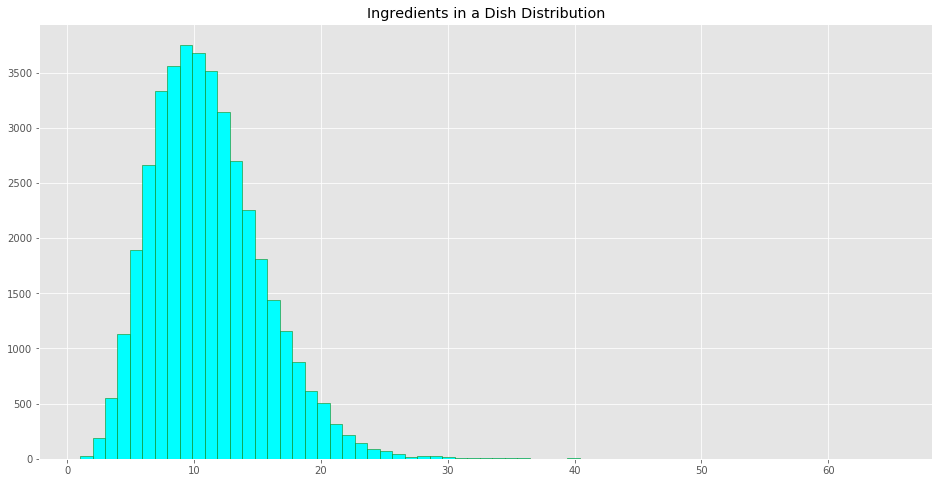

In [69]:
plt.hist(train['ingredients'].str.len(), bins=train['ingredients'].str.len().max(), edgecolor='g', color="aqua")
plt.gcf().set_size_inches(16,8)
plt.title("Ingredients in a Dish Distribution")
plt.show()

# Top Cuisines

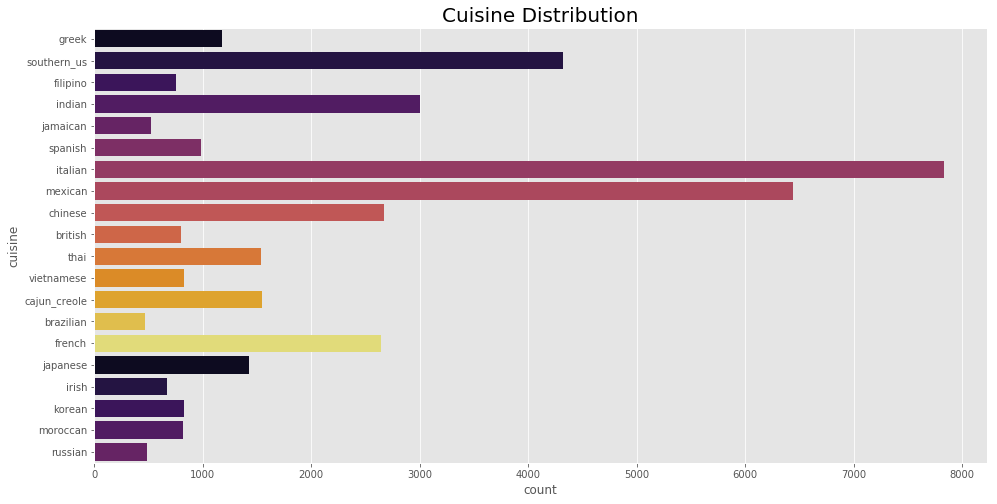

In [70]:
sns.countplot(y='cuisine', data=train, palette=sns.color_palette('inferno', 15))
plt.gcf().set_size_inches(16, 8)
plt.title("Cuisine Distribution", size=20)
plt.show()

# Main Ingredients

                           Ingredient  Count
0                                          6
1              (    oz.) tomato sauce     11
2               (   oz.) tomato paste      9
3     (10 oz.) frozen chopped spinach      5
4   (14 oz.) sweetened condensed milk      2
5           (14.5 oz.) diced tomatoes      3
6              (15 oz.) refried beans      3
7                        1 inch thick      2
8               1% low-fat buttermilk      4
9           1% low-fat chocolate milk      2
10          1% low-fat cottage cheese     12
11                    1% low-fat milk    193
12             2 1/2 to 3 lb. chicken      2
13           2% low fat cheddar chees      1
14          2% low-fat cottage cheese      6


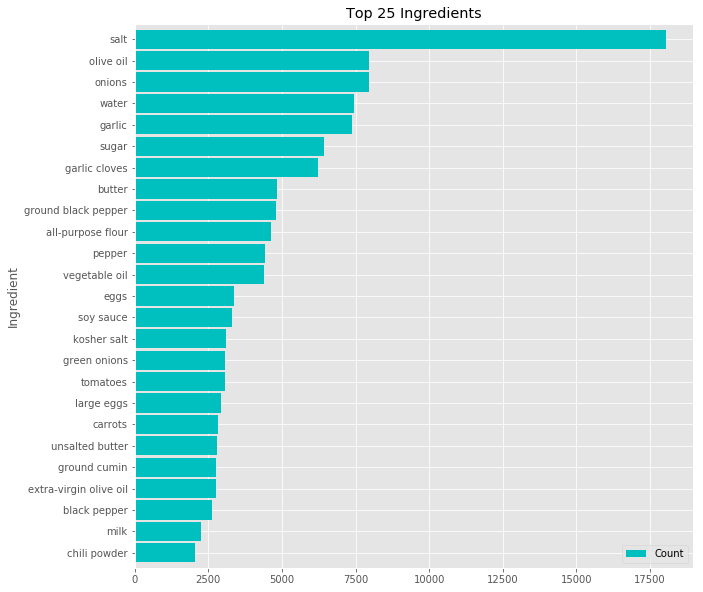

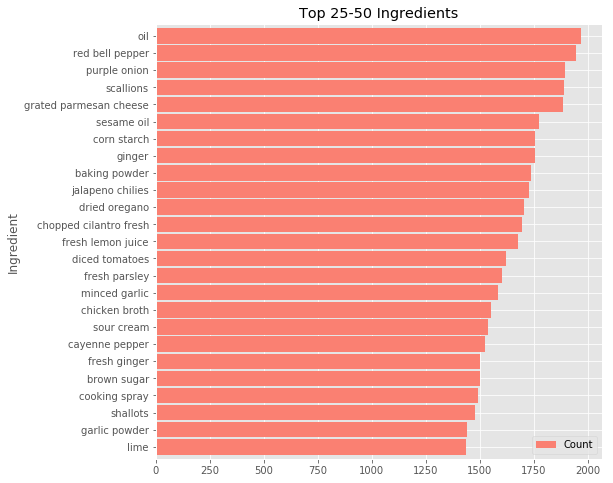

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')], lowercase=False)
counts = vec.fit_transform(train['all_ingredients'])
count = dict(zip(vec.get_feature_names(), counts.sum(axis=0).tolist()[0]))
count = pd.DataFrame(list(count.items()),columns=['Ingredient','Count'])
print(count.iloc[:15])

count.set_index('Ingredient').sort_values('Count',ascending=False)[:25].plot.barh(width=0.9, color='c')

plt.gcf().set_size_inches(10,10)
plt.gca().invert_yaxis()
plt.title('Top 25 Ingredients')
plt.show()

count.set_index('Ingredient').sort_values('Count',ascending=False)[25:50].plot.barh(width=0.9, color='salmon')

plt.gcf().set_size_inches(8,8)
plt.gca().invert_yaxis()
plt.title('Top 25-50 Ingredients')
plt.show()
